# ICSS(AM) analysis for cohort01

**METADATA:**

|Sex    | ICSS+ShA | ICSS+LgA   |
|:-----:|:--------:|:----------:|
|Males  | NULL     | SG5, SG7   |
|-------|----------|------------|
|Females| NULL     | SG4, SG6   |
|-------|----------|------------|

**OUTLINE:**
1. Load data
2. Plot individual animals
    1. Pass 1-4
        1. Theta0
        2. M50
        3. MaxRate
    2. Pass 2-4
        1. Theta0
        2. M50
        3. MaxRate
3. Plot groups
    1. Scatter and line plots: Pass 2-4
        1. Theta0
        2. M50
        3. MaxRate
    2. Line plots: Mean +/- SEM of Pass 2-4
        1. Theta0
        2. M50
        3. MaxRate
---

In [2]:
%load_ext rpy2.ipython

In [3]:
%%capture
%%R
library(tidyverse)
library(lubridate)

---
## 1. Load data

In [16]:
%%capture
%%R
# 1.1. Collating all the files into one tibble
# loading data: set the path to 
ICSS_dataDir <- "~/Dropbox (Partners HealthCare)/Projects/R01_2017_OxycSA-NASh-Glutamate/_data_R01_2017/_data_R01_2017_ICSS/_ana_files/Cohort00/"
ICSS_data <- read_csv(file.path(ICSS_dataDir, "_icssData_am_cohort01_raw_longform.csv"))
ICSS_normData <- read_csv(file.path(ICSS_dataDir, "_icssData_am_cohort01_normalized_longform.csv"))

In [17]:
%%R
ICSS_data %>% print

# A tibble: 704 x 7
   Date       Subject Experiment  Pass    T0   M50 MaxRate
   <date>     <chr>   <chr>      <dbl> <dbl> <dbl>   <dbl>
 1 2018-09-04 SG4     LgA-Female     1  26.2  57.6      51
 2 2018-09-04 SG4     LgA-Female     2  25.3  42.8      36
 3 2018-09-04 SG4     LgA-Female     3  50    56.1      19
 4 2018-09-04 SG4     LgA-Female     4  41.4  79.0      28
 5 2018-09-05 SG4     LgA-Female     1  27.8  75.4      33
 6 2018-09-05 SG4     LgA-Female     2  34.6  53.7      29
 7 2018-09-05 SG4     LgA-Female     3  54.9  68.0      18
 8 2018-09-05 SG4     LgA-Female     4  36.4  78.4      28
 9 2018-09-06 SG4     LgA-Female     1  20.7  61.7      51
10 2018-09-06 SG4     LgA-Female     2  50    60.3      26
# ... with 694 more rows


In [18]:
%%R
# 1.2. Assign data type to columns. 
# This needs to be defined after loading the dataset
# Ideal data types
# Date   | Subject  | Experiment |   Pass   |  T0   |  M50  | MaxRate
# <date> | <factor> |  <factor>  | <factor> | <num> | <num> |  <num>

ICSS_data$Subject <- ICSS_data$Subject %>% as.factor
ICSS_data$Experiment <- ICSS_data$Experiment %>% as.factor
ICSS_data$Pass <- ICSS_data$Pass %>% as.factor
ICSS_data %>% print

# A tibble: 704 x 7
   Date       Subject Experiment Pass     T0   M50 MaxRate
   <date>     <fct>   <fct>      <fct> <dbl> <dbl>   <dbl>
 1 2018-09-04 SG4     LgA-Female 1      26.2  57.6      51
 2 2018-09-04 SG4     LgA-Female 2      25.3  42.8      36
 3 2018-09-04 SG4     LgA-Female 3      50    56.1      19
 4 2018-09-04 SG4     LgA-Female 4      41.4  79.0      28
 5 2018-09-05 SG4     LgA-Female 1      27.8  75.4      33
 6 2018-09-05 SG4     LgA-Female 2      34.6  53.7      29
 7 2018-09-05 SG4     LgA-Female 3      54.9  68.0      18
 8 2018-09-05 SG4     LgA-Female 4      36.4  78.4      28
 9 2018-09-06 SG4     LgA-Female 1      20.7  61.7      51
10 2018-09-06 SG4     LgA-Female 2      50    60.3      26
# ... with 694 more rows


In [19]:
%%R
ICSS_normData %>% print

# A tibble: 518 x 7
   Date       Subject Experiment  Pass norm.T0 norm.M50 norm.MaxRate
   <date>     <chr>   <chr>      <dbl>   <dbl>    <dbl>        <dbl>
 1 2018-09-04 SG4     LgA-Female     2    46.2     52.2        154. 
 2 2018-09-04 SG4     LgA-Female     3    91.4     68.5         81.4
 3 2018-09-04 SG4     LgA-Female     4    75.6     96.5        120. 
 4 2018-09-04 SG5     LgA-Male       2    96.7     90.3        151. 
 5 2018-09-04 SG5     LgA-Male       3    86.6     96.4         89.6
 6 2018-09-04 SG5     LgA-Male       4    99.7     95.3         98.0
 7 2018-09-04 SG6     LgA-Female     2    71.5    102.         122. 
 8 2018-09-04 SG6     LgA-Female     3    74.6     85.7        100. 
 9 2018-09-04 SG6     LgA-Female     4    92.3     78.9         90.8
10 2018-09-04 SG7     LgA-Male       2    77.5     77.4         99.7
# ... with 508 more rows


In [20]:
%%R
# 1.2. Assign data type to columns. 
# This needs to be defined after loading the dataset
# Ideal data types
# Date   | Subject  | Experiment |   Pass   |  T0   |  M50  | MaxRate
# <date> | <factor> |  <factor>  | <factor> | <num> | <num> |  <num>
 
ICSS_normData$Subject <- ICSS_normData$Subject %>% as.factor
ICSS_normData$Experiment <- ICSS_normData$Experiment %>% as.factor
ICSS_normData$Pass <- ICSS_normData$Pass %>% as.factor
ICSS_normData %>% print

# A tibble: 518 x 7
   Date       Subject Experiment Pass  norm.T0 norm.M50 norm.MaxRate
   <date>     <fct>   <fct>      <fct>   <dbl>    <dbl>        <dbl>
 1 2018-09-04 SG4     LgA-Female 2        46.2     52.2        154. 
 2 2018-09-04 SG4     LgA-Female 3        91.4     68.5         81.4
 3 2018-09-04 SG4     LgA-Female 4        75.6     96.5        120. 
 4 2018-09-04 SG5     LgA-Male   2        96.7     90.3        151. 
 5 2018-09-04 SG5     LgA-Male   3        86.6     96.4         89.6
 6 2018-09-04 SG5     LgA-Male   4        99.7     95.3         98.0
 7 2018-09-04 SG6     LgA-Female 2        71.5    102.         122. 
 8 2018-09-04 SG6     LgA-Female 3        74.6     85.7        100. 
 9 2018-09-04 SG6     LgA-Female 4        92.3     78.9         90.8
10 2018-09-04 SG7     LgA-Male   2        77.5     77.4         99.7
# ... with 508 more rows


---
## 2. Plot individual animals
### 2.1. Pass 1-4 

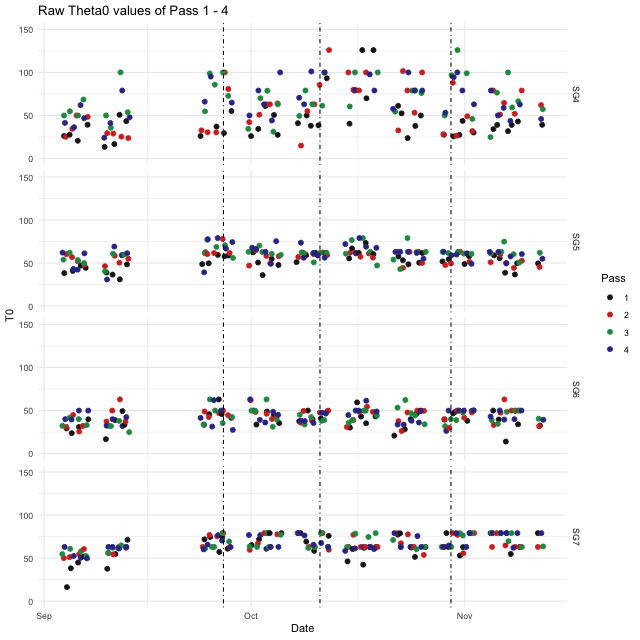

In [31]:
%%R -w 640 -h 640
# Plotting raw values for T0, Pass 1 - 4
lower_limit = 0
upper_limit = 150
ICSS_data %>% ggplot(aes(x = Date, y = T0)) + 
geom_jitter(aes(color = Pass), size = 2) + scale_color_manual(values = c("#1a1a1a", "#d73027", "#1a9850", "#313695")) +
ylim(lower_limit, upper_limit) + 
geom_vline(xintercept = unclass(as.Date("2018-09-27")), linetype=4) + 
geom_vline(xintercept = unclass(as.Date("2018-10-11")), linetype=4) +
geom_vline(xintercept = unclass(as.Date("2018-10-30")), linetype=4) + 
facet_grid(rows = vars(Subject)) + ggtitle("Raw Theta0 values of Pass 1 - 4") + theme_minimal()

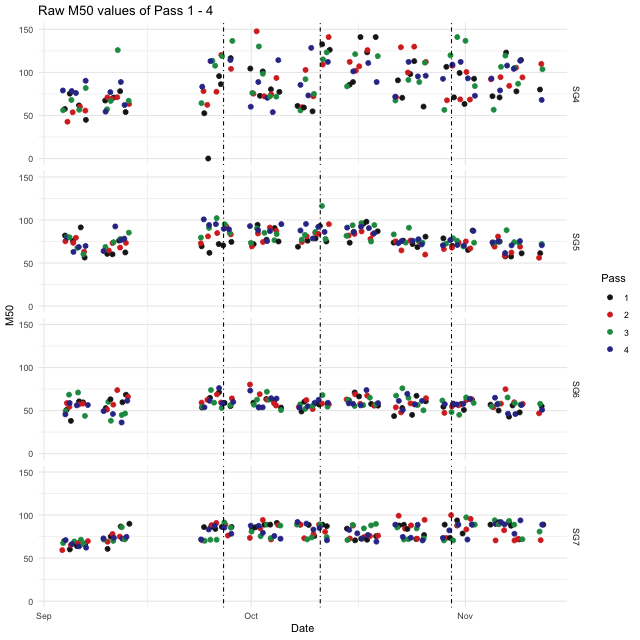

In [32]:
%%R -w 640 -h 640
# Plotting raw values for M50, Pass 1 - 4
lower_limit = 0
upper_limit = 150
ICSS_data %>% ggplot(aes(x = Date, y = M50)) + 
geom_jitter(aes(color = Pass), size = 2) + scale_color_manual(values = c("#1a1a1a", "#d73027", "#1a9850", "#313695")) +
ylim(lower_limit, upper_limit) +
geom_vline(xintercept = unclass(as.Date("2018-09-27")), linetype=4) + 
geom_vline(xintercept = unclass(as.Date("2018-10-11")), linetype=4) +
geom_vline(xintercept = unclass(as.Date("2018-10-30")), linetype=4) + 
facet_grid(rows = vars(Subject)) + ggtitle("Raw M50 values of Pass 1 - 4") + theme_minimal()

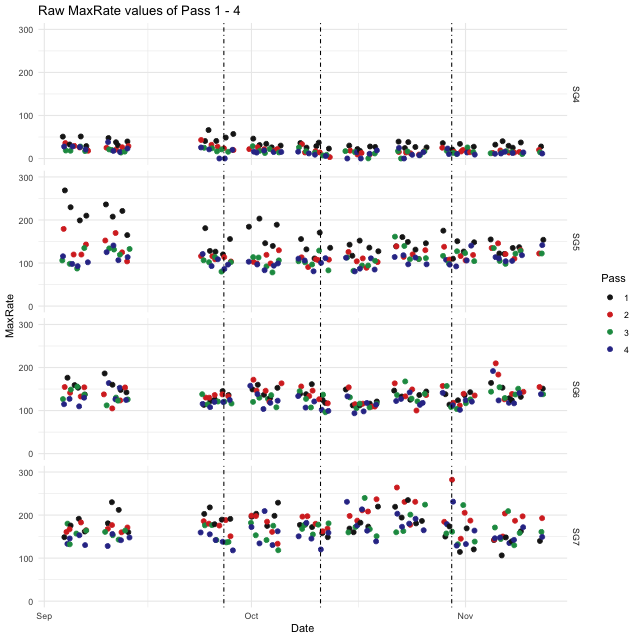

In [33]:
%%R -w 640 -h 640
# Plotting raw values for MaxRate, Pass 1 - 4
lower_limit = 0
upper_limit = 300
ICSS_data %>% ggplot(aes(x = Date, y = MaxRate)) + 
geom_jitter(aes(color = Pass), size = 2) + scale_color_manual(values = c("#1a1a1a", "#d73027", "#1a9850", "#313695")) +
ylim(lower_limit, upper_limit) +
geom_vline(xintercept = unclass(as.Date("2018-09-27")), linetype=4) + 
geom_vline(xintercept = unclass(as.Date("2018-10-11")), linetype=4) +
geom_vline(xintercept = unclass(as.Date("2018-10-30")), linetype=4) + 
facet_grid(rows = vars(Subject)) + ggtitle("Raw MaxRate values of Pass 1 - 4") + theme_minimal()

### 2.2. Pass 2-4 

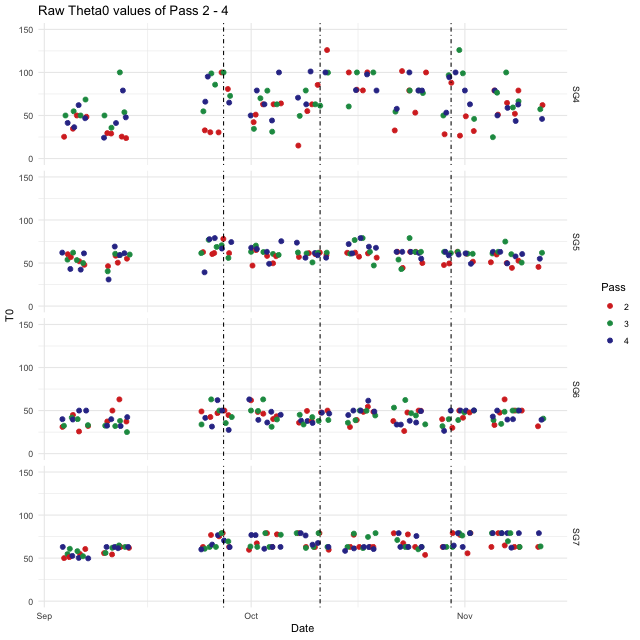

In [34]:
%%R -w 640 -h 640
# Plotting raw values for T0, Pass 2 - 4
lower_limit = 0
upper_limit = 150
ICSS_data %>% filter(Pass != 1) %>% ggplot(aes(x = Date, y = T0)) + 
geom_jitter(aes(color = Pass), size = 2) + scale_color_manual(values = c("#d73027", "#1a9850", "#313695")) +
geom_vline(xintercept = unclass(as.Date("2018-09-27")), linetype=4) + 
geom_vline(xintercept = unclass(as.Date("2018-10-11")), linetype=4) +
geom_vline(xintercept = unclass(as.Date("2018-10-30")), linetype=4) + 
ylim(lower_limit, upper_limit) +
facet_grid(rows = vars(Subject)) + ggtitle("Raw Theta0 values of Pass 2 - 4") + theme_minimal()

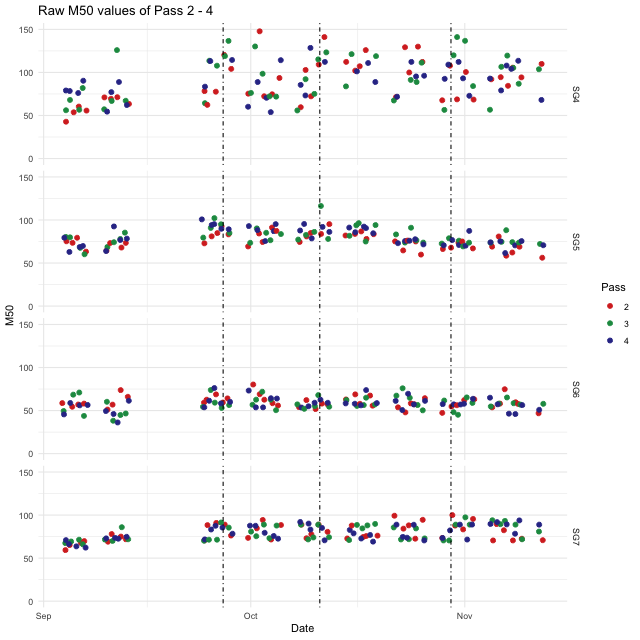

In [35]:
%%R -w 640 -h 640
# Plotting raw values for M50, Pass 2 - 4
lower_limit = 0
upper_limit = 150
ICSS_data %>% filter(Pass != 1) %>% ggplot(aes(x = Date, y = M50)) + 
geom_jitter(aes(color = Pass), size = 2) + scale_color_manual(values = c("#d73027", "#1a9850", "#313695")) +
ylim(lower_limit, upper_limit) +
geom_vline(xintercept = unclass(as.Date("2018-09-27")), linetype=4) + 
geom_vline(xintercept = unclass(as.Date("2018-10-11")), linetype=4) +
geom_vline(xintercept = unclass(as.Date("2018-10-30")), linetype=4) + 
facet_grid(rows = vars(Subject)) + ggtitle("Raw M50 values of Pass 2 - 4") + theme_minimal()

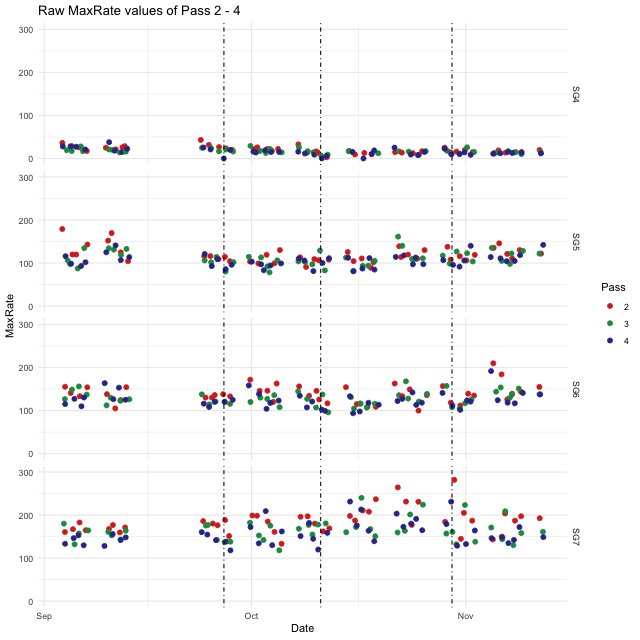

In [36]:
%%R -w 640 -h 640
# Plotting raw values for MaxRate, Pass 2 - 4
lower_limit = 0
upper_limit = 300
ICSS_data %>% filter(Pass != 1) %>% ggplot(aes(x = Date, y = MaxRate)) + 
geom_jitter(aes(color = Pass), size = 2) + scale_color_manual(values = c("#d73027", "#1a9850", "#313695")) +
ylim(lower_limit, upper_limit) +
geom_vline(xintercept = unclass(as.Date("2018-09-27")), linetype=4) + 
geom_vline(xintercept = unclass(as.Date("2018-10-11")), linetype=4) +
geom_vline(xintercept = unclass(as.Date("2018-10-30")), linetype=4) + 
facet_grid(rows = vars(Subject)) + ggtitle("Raw MaxRate values of Pass 2 - 4") + theme_minimal()

---
## 3. Plot group-wise: percent baselines
### 3.1. Scatter and line plots

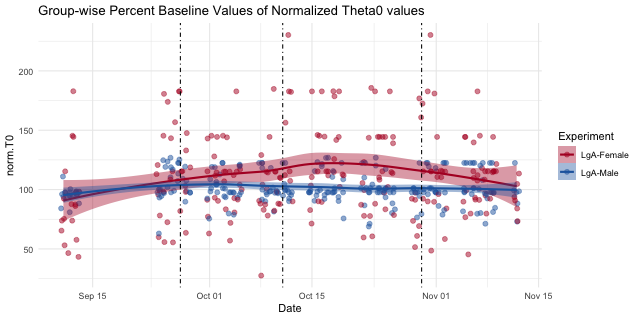

In [43]:
%%R -w 640 -h 320
# plotting all passes
ICSS_normData %>% filter(Date >= "2018-09-11") %>% group_by(Date, Subject, Experiment, Pass) %>% summarise_all(mean) %>%
ggplot(aes(x= Date, y = norm.T0, color = Experiment, fill = Experiment)) + 
geom_jitter(alpha = 0.5, size = 2) + geom_smooth(method = 'loess') +
scale_color_manual(values = c("#b2182b", "#2166ac", "#f4a582", "#92c5de")) +
scale_fill_manual(values = c("#b2182b", "#2166ac", "#f4a582", "#92c5de")) +
geom_vline(xintercept = unclass(as.Date("2018-09-27")), linetype=4) + 
geom_vline(xintercept = unclass(as.Date("2018-10-11")), linetype=4) +
geom_vline(xintercept = unclass(as.Date("2018-10-30")), linetype=4) + 
ggtitle("Group-wise Percent Baseline Values of Normalized Theta0 values") + 
theme_minimal()

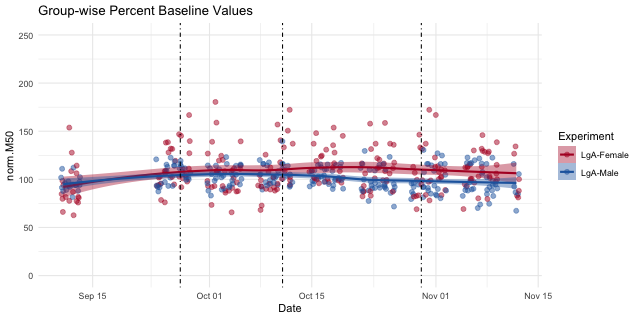

In [38]:
%%R -w 640 -h 320
# plotting all the passes
ICSS_normData %>% filter(Date >= "2018-09-11") %>% group_by(Date, Subject, Experiment, Pass) %>% summarise_all(mean) %>%
ggplot(aes(x= Date, y = norm.M50, color = Experiment, fill = Experiment)) + 
geom_jitter(alpha = 0.5, size = 2) + geom_smooth(method = 'loess') + 
scale_color_manual(values = c("#b2182b", "#2166ac", "#f4a582", "#92c5de")) +
scale_fill_manual(values = c("#b2182b", "#2166ac", "#f4a582", "#92c5de")) +
ylim(0, 250) + 
geom_vline(xintercept = unclass(as.Date("2018-09-27")), linetype=4) + 
geom_vline(xintercept = unclass(as.Date("2018-10-11")), linetype=4) +
geom_vline(xintercept = unclass(as.Date("2018-10-30")), linetype=4) + 
ggtitle("Group-wise Percent Baseline Values") + 
theme_minimal()

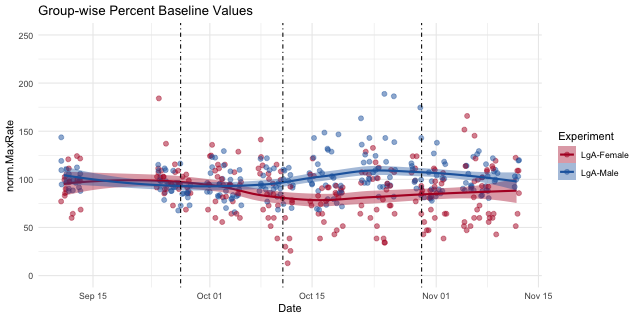

In [39]:
%%R -w 640 -h 320
# plotting the means of all the passes
ICSS_normData %>% filter(Date >= "2018-09-11") %>% group_by(Date, Subject, Experiment, Pass) %>% summarise_all(mean) %>%
ggplot(aes(x= Date, y = norm.MaxRate, color = Experiment, fill = Experiment)) + 
geom_jitter(alpha = 0.5, size = 2) + geom_smooth(method = 'loess') + 
scale_color_manual(values = c("#b2182b", "#2166ac", "#f4a582", "#92c5de")) +
scale_fill_manual(values = c("#b2182b", "#2166ac", "#f4a582", "#92c5de")) +
ylim(0, 250) + 
geom_vline(xintercept = unclass(as.Date("2018-09-27")), linetype=4) + 
geom_vline(xintercept = unclass(as.Date("2018-10-11")), linetype=4) +
geom_vline(xintercept = unclass(as.Date("2018-10-30")), linetype=4) + 
ggtitle("Group-wise Percent Baseline Values") +
theme_minimal()

### 3.2. Line plots: Mean +/- SEM of Pass 2-4

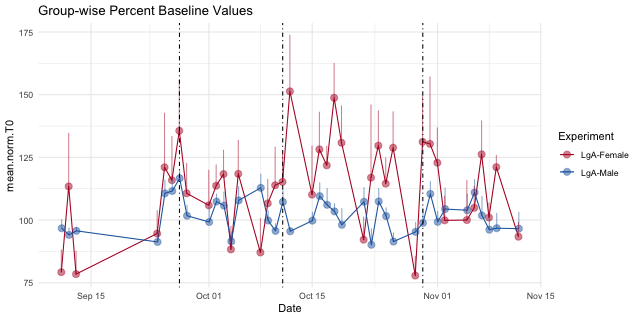

In [40]:
%%R -w 640 -h 320
# plotting the means of all the passes
ICSS_normData %>% select(-Subject, -Pass) %>% filter(Date >= "2018-09-11") %>% group_by(Date, Experiment) %>% 
summarize(
    mean.norm.T0 = mean(norm.T0), se.norm.T0 = sd(norm.T0)/sqrt(n()), 
    mean.norm.M50 = mean(norm.M50), se.norm.M50 = sd(norm.M50), 
    mean.norm.MaxRate = mean(norm.MaxRate), se.norm.MaxRate = sd(norm.MaxRate)) %>% 
ggplot(aes(x= Date, y = mean.norm.T0, color = Experiment)) + 
geom_line(position=position_dodge(0.1)) +
geom_point(alpha = 0.5, position=position_dodge(0.1), size = 3) +
geom_errorbar(alpha = 0.5, aes(ymin=mean.norm.T0, ymax=mean.norm.T0+se.norm.T0), width=.1, position=position_dodge(0.1)) +
scale_color_manual(values = c("#b2182b", "#2166ac", "#f4a582", "#92c5de")) +
geom_vline(xintercept = unclass(as.Date("2018-09-27")), linetype=4) + 
geom_vline(xintercept = unclass(as.Date("2018-10-11")), linetype=4) +
geom_vline(xintercept = unclass(as.Date("2018-10-30")), linetype=4) + 
ggtitle("Group-wise Percent Baseline Values") +
theme_minimal()

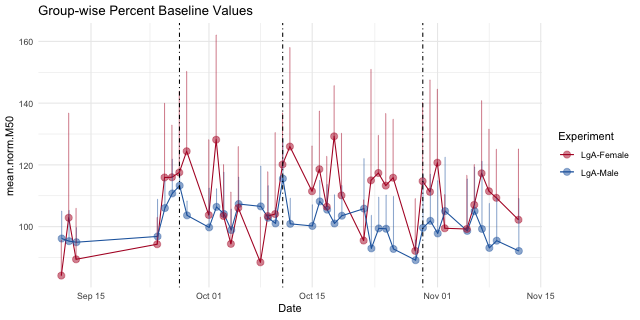

In [41]:
%%R -w 640 -h 320
# plotting the means of all the passes
ICSS_normData %>% select(-Subject, -Pass) %>% filter(Date >= "2018-09-11") %>% group_by(Date, Experiment) %>% 
summarize(
    mean.norm.T0 = mean(norm.T0), se.norm.T0 = sd(norm.T0)/sqrt(n()), 
    mean.norm.M50 = mean(norm.M50), se.norm.M50 = sd(norm.M50), 
    mean.norm.MaxRate = mean(norm.MaxRate), se.norm.MaxRate = sd(norm.MaxRate)) %>% 
ggplot(aes(x= Date, y = mean.norm.M50, color = Experiment)) + 
geom_line(position=position_dodge(0.1)) +
geom_point(alpha = 0.5, position=position_dodge(0.1), size = 3) +
geom_errorbar(alpha = 0.5, aes(ymin=mean.norm.M50, ymax=mean.norm.M50+se.norm.M50), width=.1, position=position_dodge(0.1)) +
scale_color_manual(values = c("#b2182b", "#2166ac", "#f4a582", "#92c5de")) +
geom_vline(xintercept = unclass(as.Date("2018-09-27")), linetype=4) + 
geom_vline(xintercept = unclass(as.Date("2018-10-11")), linetype=4) +
geom_vline(xintercept = unclass(as.Date("2018-10-30")), linetype=4) + 
ggtitle("Group-wise Percent Baseline Values") +
theme_minimal()

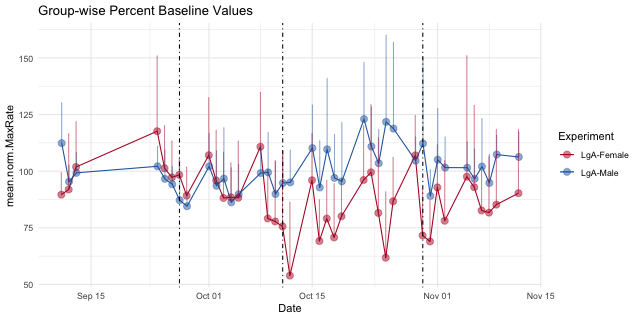

In [42]:
%%R -w 640 -h 320
# plotting the means of all the passes
ICSS_normData %>% select(-Subject, -Pass) %>% filter(Date >= "2018-09-11") %>% group_by(Date, Experiment) %>% 
summarize(
    mean.norm.T0 = mean(norm.T0), se.norm.T0 = sd(norm.T0)/sqrt(n()), 
    mean.norm.M50 = mean(norm.M50), se.norm.M50 = sd(norm.M50), 
    mean.norm.MaxRate = mean(norm.MaxRate), se.norm.MaxRate = sd(norm.MaxRate)) %>% 
ggplot(aes(x= Date, y = mean.norm.MaxRate, color = Experiment)) + 
geom_line(position=position_dodge(0.1)) +
geom_point(alpha = 0.5, position=position_dodge(0.1), size = 3) +
geom_errorbar(alpha = 0.5, aes(ymin=mean.norm.MaxRate, ymax=mean.norm.MaxRate+se.norm.MaxRate), width=.1, position=position_dodge(0.1)) +
scale_color_manual(values = c("#b2182b", "#2166ac", "#f4a582", "#92c5de")) +
geom_vline(xintercept = unclass(as.Date("2018-09-27")), linetype=4) + 
geom_vline(xintercept = unclass(as.Date("2018-10-11")), linetype=4) +
geom_vline(xintercept = unclass(as.Date("2018-10-30")), linetype=4) + 
ggtitle("Group-wise Percent Baseline Values") +
theme_minimal()